# <font color=Orange>** Project - Alternus Vera** <br></font>
## <font color=brown>** Team: code-monkeys** <br></font>
## <font color=brown>** Name: Puja Kawale (012506156)** <br></font>
## <font color=brown>** GitHub: https://github.com/pujakb/ML/tree/master/News_Classifier** <br></font>
## <font color=brown>** Data preparation and Distillation :**<br> </font>
####   <font color=green>** Removing stop words and punchuations**<br> </font>
####   <font color=green>** lower case implementation**<br> </font>
####   <font color=green>** stemming, lematizing**<br> </font>
####   <font color=green>** tokenizing**<br></font>
####   <font color=green>** LDA**<br></font>
####   <font color=green>** LSA**<br></font>
####   <font color=green>** LDA Vs LSA comparision**<br></font>
####   <font color=green>** POS**<br></font>
####   <font color=green>** tSNE**<br></font>
####   <font color=green>** Bokeh clusters**<br></font>
## <font color=brown>** Classifiers on model :**<br></font>
####   <font color=green>** Decision tree, SVM, Naive Bayes, Random Forest, Logistic regression**<br> </font>

## <font color=orange> Importing the Libraries</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
import csv

##  <font color=orange> Loading the Data</font>

In [2]:
training = pd.read_csv('C://PUJAMS//machinelearning//csvfiles//liar_dataset//train.tsv',sep='\t')
testing = pd.read_csv('C://PUJAMS//machinelearning//csvfiles//liar_dataset//test.tsv',sep='\t')
validation = pd.read_csv('C://PUJAMS//machinelearning//csvfiles//liar_dataset//valid.tsv',sep='\t')
vocabulary = pd.read_csv (r'C:\PUJAMS\machinelearning\csvfiles\liar_dataset\sensation_dictionary.csv')

In [3]:
columns = ['id', 'label', 'statement', 'subjects', 'speaker',
         'speaker_job', 'state', 'party', 'barely_true_counts',
         'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts',
         'context']
training.columns = columns
testing.columns = columns
validation.columns = columns
training.head(5)

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [4]:
#data integrity check (missing label values)
#none of the datasets contains missing values therefore no cleaning required
def data_qualityCheck():
    
    print("Checking data qualitites...")
    training.isnull().sum()
    training.info()
        
    print("check finished.")

    #below datasets were also used
    testing.isnull().sum()
    testing.info()

    validation.isnull().sum()
    validation.info()

data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 14 columns):
id                      10239 non-null object
label                   10239 non-null object
statement               10239 non-null object
subjects                10237 non-null object
speaker                 10237 non-null object
speaker_job             7342 non-null object
state                   8031 non-null object
party                   10237 non-null object
barely_true_counts      10237 non-null float64
false_counts            10237 non-null float64
half_true_counts        10237 non-null float64
mostly_true_counts      10237 non-null float64
pants_on_fire_counts    10237 non-null float64
context                 10137 non-null object
dtypes: float64(5), object(9)
memory usage: 1.1+ MB
check finished.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 14 columns):
id                      1266 non-null obj

## <font color=orange>  Observing the data </font>

In [5]:
#data observation
def data_obs():
    print("training dataset size:")
    print(training.shape)
    print(training.head(10))

    #below dataset were used for testing and validation purposes
    print(training.shape)
    print(training.head(10))
    
    print(validation.shape)
    print(validation.head(10))
    
data_obs()

training dataset size:
(10239, 14)
           id        label                                          statement  \
0  10540.json    half-true  When did the decline of coal start? It started...   
1    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
2   1123.json        false  Health care reform legislation is likely to ma...   
3   9028.json    half-true  The economic turnaround started at the end of ...   
4  12465.json         true  The Chicago Bears have had more starting quart...   
5   2342.json  barely-true  Jim Dunnam has not lived in the district he re...   
6    153.json    half-true  I'm the only person on this stage who has work...   
7   5602.json    half-true  However, it took $19.5 million in Oregon Lotte...   
8   9741.json  mostly-true  Says GOP primary opponents Glenn Grothman and ...   
9   7115.json  mostly-true  For the first time in history, the share of th...   

                                    subjects                 speaker  \
0

9                     0  a speech at the Democratic National Convention...  


In [6]:
# training=training[['label','statement']]
# training.head(5)

In [7]:
training.groupby('label').describe()

barely_true_counts                                             \
                         count       mean        std  min  25%  50%   75%   
label                                                                       
barely-true             1654.0  11.730351  17.605713  1.0  1.0  3.0  13.0   
false                   1992.0  11.610944  19.224930  0.0  0.0  2.0  11.0   
half-true               2114.0  11.848628  19.512656  0.0  0.0  2.0  14.0   
mostly-true             1962.0  11.825688  19.999061  0.0  0.0  2.0  14.0   
pants-fire               839.0  11.050060  17.162980  0.0  0.0  5.0  11.0   
true                    1676.0  10.754773  18.920702  0.0  0.0  1.0  11.0   

                  false_counts             ...   mostly_true_counts         \
              max        count       mean  ...                  75%    max   
label                                      ...                               
barely-true  70.0       1654.0  12.422612  ...                 11.0  163.0   
false        70.0       1992.0  15.785643  ...                 10.0  163.0   
half-true    70.0       2114.0  12.568117  ...                 15.0  163.0   
mostly-true  70.0       1962.0  12.280836  ...                 16.0  163.0   
pants-fire   70.0        839.0  18.162098  ...                  6.0  163.0   
true         70.0       1676.0  10.818616  ...                 11.0  163.0   

            pants_on_fire_counts                                             \
                           count       mean        std  min  25%  50%   75%   
label                                                                         
barely-true               1654.0   5.379686  13.483820  0.0  0.0  1.0   5.0   
false                     1992.0   7.902610  18.973442  0.0  0.0  1.0   7.0   
half-true                 2114.0   4.500946  11.303759  0.0  0.0  0.0   5.0   
mostly-true               1962.0   3.772681   9.867625  0.0  0.0  0.0   4.0   
pants-fire                 839.0  19.901073  32.495250  1.0  1.0  3.0  18.0   
true                      1676.0   3.124105   7.805248  0.0  0.0  0.0   3.0   

                    
               max  
label               
barely-true  105.0  
false        105.0  
half-true    105.0  
mostly-true  105.0  
pants-fire   105.0  
true         105.0  

[6 rows x 40 columns]

In [8]:
training.iloc[0]["statement"][:len(training.iloc[0]["statement"])]

'When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BE9BE48>,
      dtype=object)

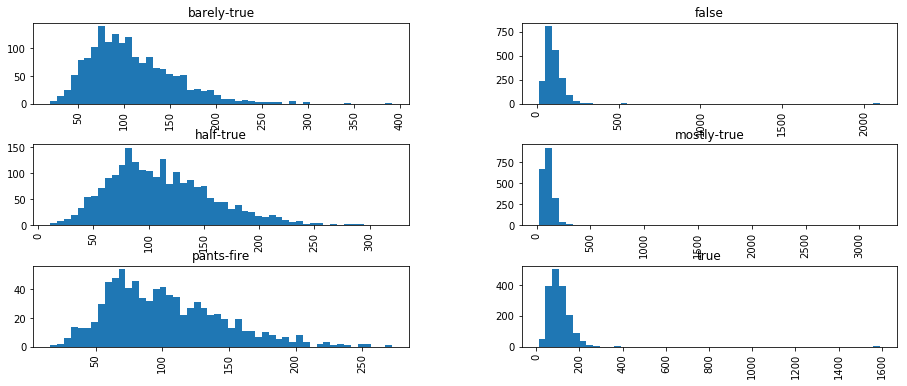

In [9]:
training['length'] = training['statement'].apply(len)
training.hist(column='length',by='label',bins=50, figsize=(15,6))

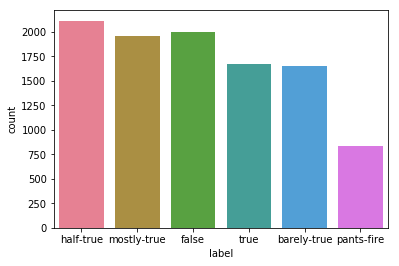

In [10]:
#distribution of classes for prediction
def create_distribution(dataFile):
    
    return sns.countplot(x='label', data=dataFile, palette='husl')
    

#by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(training)

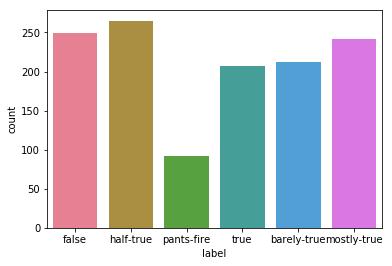

In [11]:
create_distribution(testing)

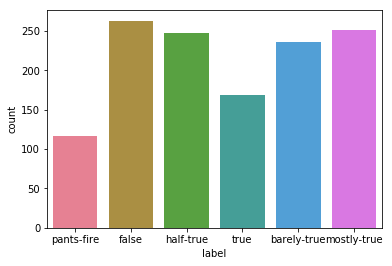

In [12]:
create_distribution(validation)

In [13]:
training.label.unique()

array(['half-true', 'mostly-true', 'false', 'true', 'barely-true',
       'pants-fire'], dtype=object)

In [15]:
# This is in case we want to conduct binary classification
# Our focus is to develop a multi-classification model

# train_news['label']=np.where(train_news['label']=='half-true','true',train_news['label'])
# train_news['label']=np.where(train_news['label']=='mostly-true','true',train_news['label'])
# train_news['label']=np.where(train_news['label']=='barely-true','false',train_news['label'])
# train_news['label']=np.where(train_news['label']=='pants-fire','false',train_news['label'])
# train_news['label']=np.where(train_news['label']=='TRUE','true',train_news['label'])
# train_news['label']=np.where(train_news['label']=='FALSE','false',train_news['label'])

# plt.title('statement count Vs label')
# train_news.groupby(['label']).size().plot(kind='bar', color='blue')
# plt.xlabel('count')
# plt.show()

In [16]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize 
nltk.download('punkt')

def TextCleansing(txt):
    rem = re.sub('[^a-zA-Z]', ' ', txt)
    rem = rem.lower()
    rem = rem.split()
    ps = PorterStemmer()
    rem = [ps.stem(word) for word in rem if not word in set(stopwords.words('english'))]
    rem = ' '.join(rem)
    return rem

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
stop_words=set(stopwords.words('english'))
print(stop_words)

{'to', 'of', 'once', 'he', 'into', 't', 'ours', 'doing', "weren't", "should've", 'if', 'through', 'yours', 'am', 'during', 'out', "aren't", "wouldn't", 'did', "won't", 'wouldn', 'all', 'they', 'below', 'do', 'few', 'been', 'can', 'isn', 'by', 'against', 'i', 'why', 've', 'whom', 'now', 'himself', 'and', 'or', 'we', 'in', 'couldn', "mightn't", 'you', 'being', 'own', 'other', 'aren', 'who', 'was', 'are', 'shouldn', 'mightn', "don't", 'what', 'for', 'mustn', 'down', "you'll", 'a', 'their', 'than', 'most', "doesn't", 'its', 'very', 'were', 'won', "couldn't", 'some', 'about', 'same', 'on', 'your', 'herself', 'but', 'ma', 'while', 'when', 'have', "shouldn't", "hadn't", 'more', 'my', "you'd", 'over', 'haven', 'not', "hasn't", "you're", 'be', 'is', 'just', 'her', "she's", 'from', 'him', 'because', 'above', 'there', 'those', 'which', 'shan', "wasn't", 'it', 'll', 'his', "haven't", 'further', 'hers', 'weren', 'until', 'ain', 'our', 'doesn', 'before', 'd', "mustn't", 'only', 'both', 'me', "didn't

In [19]:
training_head = training[['statement']]
training_head['index'] = training_head.index
documents = training_head

C:\Users\PB\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
print(len(documents))
print(documents[:5])

10239
                                           statement  index
0  When did the decline of coal start? It started...      0
1  Hillary Clinton agrees with John McCain "by vo...      1
2  Health care reform legislation is likely to ma...      2
3  The economic turnaround started at the end of ...      3
4  The Chicago Bears have had more starting quart...      4


## <font color=orange>  Data Preprocessing </font>

In [21]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

C:\Users\PB\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PB\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
def text_preprocessing(df_base):
    df=df_base.copy()
    # lowercase the text
    df['statement']=df['statement'].str.lower()
    # word tokenization
    df['statement']=df['statement'].map(lambda x: nltk.word_tokenize(x))
    # remove stop words and non alphanumeric charaters
    df['statement']=df['statement'].map(lambda x: [w for w in x if (not w in stop_words) and w.isalpha()])
    # lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    df['statement']=df['statement'].map(lambda x: [ wordnet_lemmatizer.lemmatize(w) for w in x])    
    # stemming
    porter = PorterStemmer()
    df['statement']=df['statement'].map(lambda x: [porter.stem(w) for w in x] )
    return df

In [23]:
processed =text_preprocessing(training)
processed.head()   

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,length
0,10540.json,half-true,"[declin, coal, start, start, natur, ga, took, ...","energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,141
1,324.json,mostly-true,"[hillari, clinton, agre, john, mccain, vote, g...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,105
2,1123.json,false,"[health, care, reform, legisl, like, mandat, f...",health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,78
3,9028.json,half-true,"[econom, turnaround, start, end, term]","economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,54
4,12465.json,true,"[chicago, bear, start, quarterback, last, year...",education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,155


## <font color=orange>  Word2Vec </font>

Word2vec is a two-layer neural net that processes text. Its input is a text corpus and its output is a set of vectors: feature vectors for words in that corpus.it turns text into a numerical form that deep nets can understand

In [24]:
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [25]:
LabeledSentence = gensim.models.doc2vec.LabeledSentence

In [26]:
def labelled_sentences(articles, label_type):
    labelledSentences = []
    for i,_d in enumerate(articles):
        labelledSentences.append(LabeledSentence(_d, label_type[i]))
    return labelledSentences

In [27]:
processed_labelled=labelled_sentences(processed['statement'],processed['label'])
processed_labelled[1]

LabeledSentence(words=['hillari', 'clinton', 'agre', 'john', 'mccain', 'vote', 'give', 'georg', 'bush', 'benefit', 'doubt', 'iran'], tags='mostly-true')

In [28]:
tagged = [TaggedDocument(words=_d, tags=[str(i)]) for i, _d in enumerate(processed['statement'])]

In [29]:
tagged_words=[x.words for x in tagged]
tagged_words_1D=[]
for row in range(len(tagged_words)):
    for col in range(len(tagged_words[row])):
        tagged_words.append(tagged_words[row][col])
        
n_dim=300
w2v = Word2Vec(size=n_dim, min_count=0)
w2v.build_vocab(tagged_words)
w2v.train(tagged_words,total_examples=w2v.corpus_count,epochs=w2v.epochs)

(1043861, 3317680)

In [30]:
w2v.most_similar('war')

[('rapid', 0.9978175759315491),
 ('longest', 0.9975180625915527),
 ('fundrais', 0.9974884986877441),
 ('incid', 0.997333824634552),
 ('extrem', 0.9971774816513062),
 ('watch', 0.9971362948417664),
 ('jump', 0.9971160292625427),
 ('gasolin', 0.9970066547393799),
 ('happen', 0.996982216835022),
 ('document', 0.9969084858894348)]

In [31]:
processed_statements=processed[['statement','label']]
processed_statements_vectorized=processed_statements['statement'].map(lambda x: [w2v[w] for w in x])

processed_statements['statement']=processed_statements_vectorized

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# list(le.inverse_transform(processed_statements['label']))
processed_statements['label']=le.fit_transform(processed_statements['label'])

processed_statements.head()

,statement,label
0,"[[0.08882012, 0.052362617, 0.044050723, 0.0263...",2
1,"[[0.23452127, -0.103835195, -0.14599872, 0.228...",3
2,"[[0.73109084, 0.56986696, -0.44808704, -0.1760...",1
3,"[[0.22355153, 0.084662944, 0.04774518, 0.07887...",2
4,"[[0.09246858, 0.02514211, 0.0040849606, 0.0322...",5


In [32]:
def document_vector(doc):
    return np.mean(doc, axis=0)

for row_idx in range(len(processed_statements['statement'])):
    for col_idx in range(len(processed_statements['statement'][row_idx])):
        processed_statements['statement'][row_idx][col_idx]=document_vector(processed_statements['statement'][row_idx][col_idx])
        
#df_train_statements['statement']=df_train_statements['statement'].map(document_vector)
processed_statements.drop(index=4497,inplace=True)
processed_statements.reset_index(drop=True)

,statement,label
0,"[0.0015531193, 0.0030009032, 0.0048259343, 0.0...",2
1,"[0.005818305, 0.010304897, 0.0036140848, 0.007...",3
2,"[0.0039481856, 0.018210806, 0.00598304, 0.0067...",1
3,"[0.0058103004, 0.001316087, 0.0048259343, 0.00...",2
4,"[0.0027394965, 0.002334294, 0.0048259343, -2.0...",5
5,"[0.0051740645, 8.1900405e-05, 0.007307156, 0.0...",0
6,"[0.0063952627, 0.003622454, 0.0065158713, 0.00...",2
7,"[0.0009564376, 0.0042650383, 0.006832938, 0.00...",2
8,"[0.0073591056, 0.004535676, 0.0032518224, 0.00...",3
9,"[0.004452211, 0.0056764404, 0.0058674715, 0.00...",3


In [33]:
texts=[]
for x in processed_statements['statement'].values:
    texts.append(x)   
X=pd.DataFrame(texts)
X=X.fillna(0)
y=processed_statements[['label']]
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size = .2, random_state = 1)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
8892,0.005431,0.001999,0.007128,0.002360,0.006550,0.007985,0.004348,0.007403,0.007985,0.003560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2933,0.007359,0.009108,0.013931,0.003614,0.002833,0.002692,0.013931,0.001240,0.002692,0.004200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3933,0.003033,0.007970,0.005704,0.006502,0.004355,0.006663,0.002504,0.001453,0.001387,0.003628,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3406,0.007359,-0.003100,0.018964,0.001833,0.003709,0.002651,0.000533,0.005263,0.006166,0.003233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7210,0.006073,0.005896,0.003588,0.001695,0.006648,0.005372,0.001766,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##   <font color=orange> Classifiers : </font>
###  <font color=brown>   1) Logistic Regression <br>
###  <font color=brown>  2) Decision Tree<br>
###  <font color=brown>  3) GNB - Gaussian Naive Bayes<br>
###  <font color=brown>  4) Random Forest Classifier<br> </font>
    

In [34]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn import linear_model

lm = linear_model.LogisticRegression(verbose=1)
model = lm.fit(X_train, y_train)
print (model)
predictions = lm.predict(X_test)

print ("Score:", model.score(X_test, y_test))

print(metrics.classification_report(y_test,predictions))

[LibLinear]LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)
Score: 0.2109375
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       309
          1       0.00      0.00      0.00       396
          2       0.21      1.00      0.35       432
          3       0.00      0.00      0.00       392
          4       0.00      0.00      0.00       171
          5       0.00      0.00      0.00       348

avg / total       0.04      0.21      0.07      2048



In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
dec_pred = clf_gini.predict(X_test)
print ("Score:", clf_gini.score(X_test, y_test))

print(metrics.classification_report(y_test,dec_pred))

Score: 0.2099609375
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       309
          1       0.26      0.12      0.16       396
          2       0.23      0.23      0.23       432
          3       0.20      0.73      0.31       392
          4       0.00      0.00      0.00       171
          5       0.00      0.00      0.00       348

avg / total       0.14      0.21      0.14      2048



In [36]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)

print ("Score:", gnb.score(X_test, y_test))
print(metrics.classification_report(y_test,gnb_pred))

Score: 0.08935546875
             precision    recall  f1-score   support

          0       0.25      0.00      0.01       309
          1       0.00      0.00      0.00       396
          2       0.32      0.03      0.05       432
          3       0.00      0.00      0.00       392
          4       0.09      1.00      0.16       171
          5       0.00      0.00      0.00       348

avg / total       0.11      0.09      0.02      2048



In [37]:
from sklearn.ensemble import RandomForestClassifier
num_trees=200

rf=RandomForestClassifier(n_estimators=num_trees)
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)

print ("Score:", rf.score(X_test, y_test))
print(metrics.classification_report(y_test,rf_pred))

Score: 0.2177734375
             precision    recall  f1-score   support

          0       0.19      0.16      0.17       309
          1       0.23      0.25      0.24       396
          2       0.22      0.35      0.27       432
          3       0.22      0.26      0.24       392
          4       0.14      0.01      0.02       171
          5       0.21      0.12      0.15       348

avg / total       0.21      0.22      0.20      2048



### <font color=brown>From above we can conclude that Logistic regression and Decision Tree classifier are performing better that the other classifiers.</font>

## <font color=orange> Visualization:</font>
###  <font color=brown>  A popular method for visualizing document similarity is to use t-distributed stochastic neighbor embedding, t-SNE. </font>
 ### <font color=brown>  1) Load the corpus and vectorize the text using TF-IDF. </font>
 ### <font color=brown>  2) Once the corpus is vectorized we visualize it, showing the distribution of classes. </font>
 reference:http://www.scikit-yb.org/en/latest/api/text/tsne.html

Total Number of Vocab: 7539

[ 0.08882012  0.05236262  0.04405072  0.02633099  0.08770611 -0.09703708
  0.02267416 -0.05655846 -0.10878675  0.05518287]


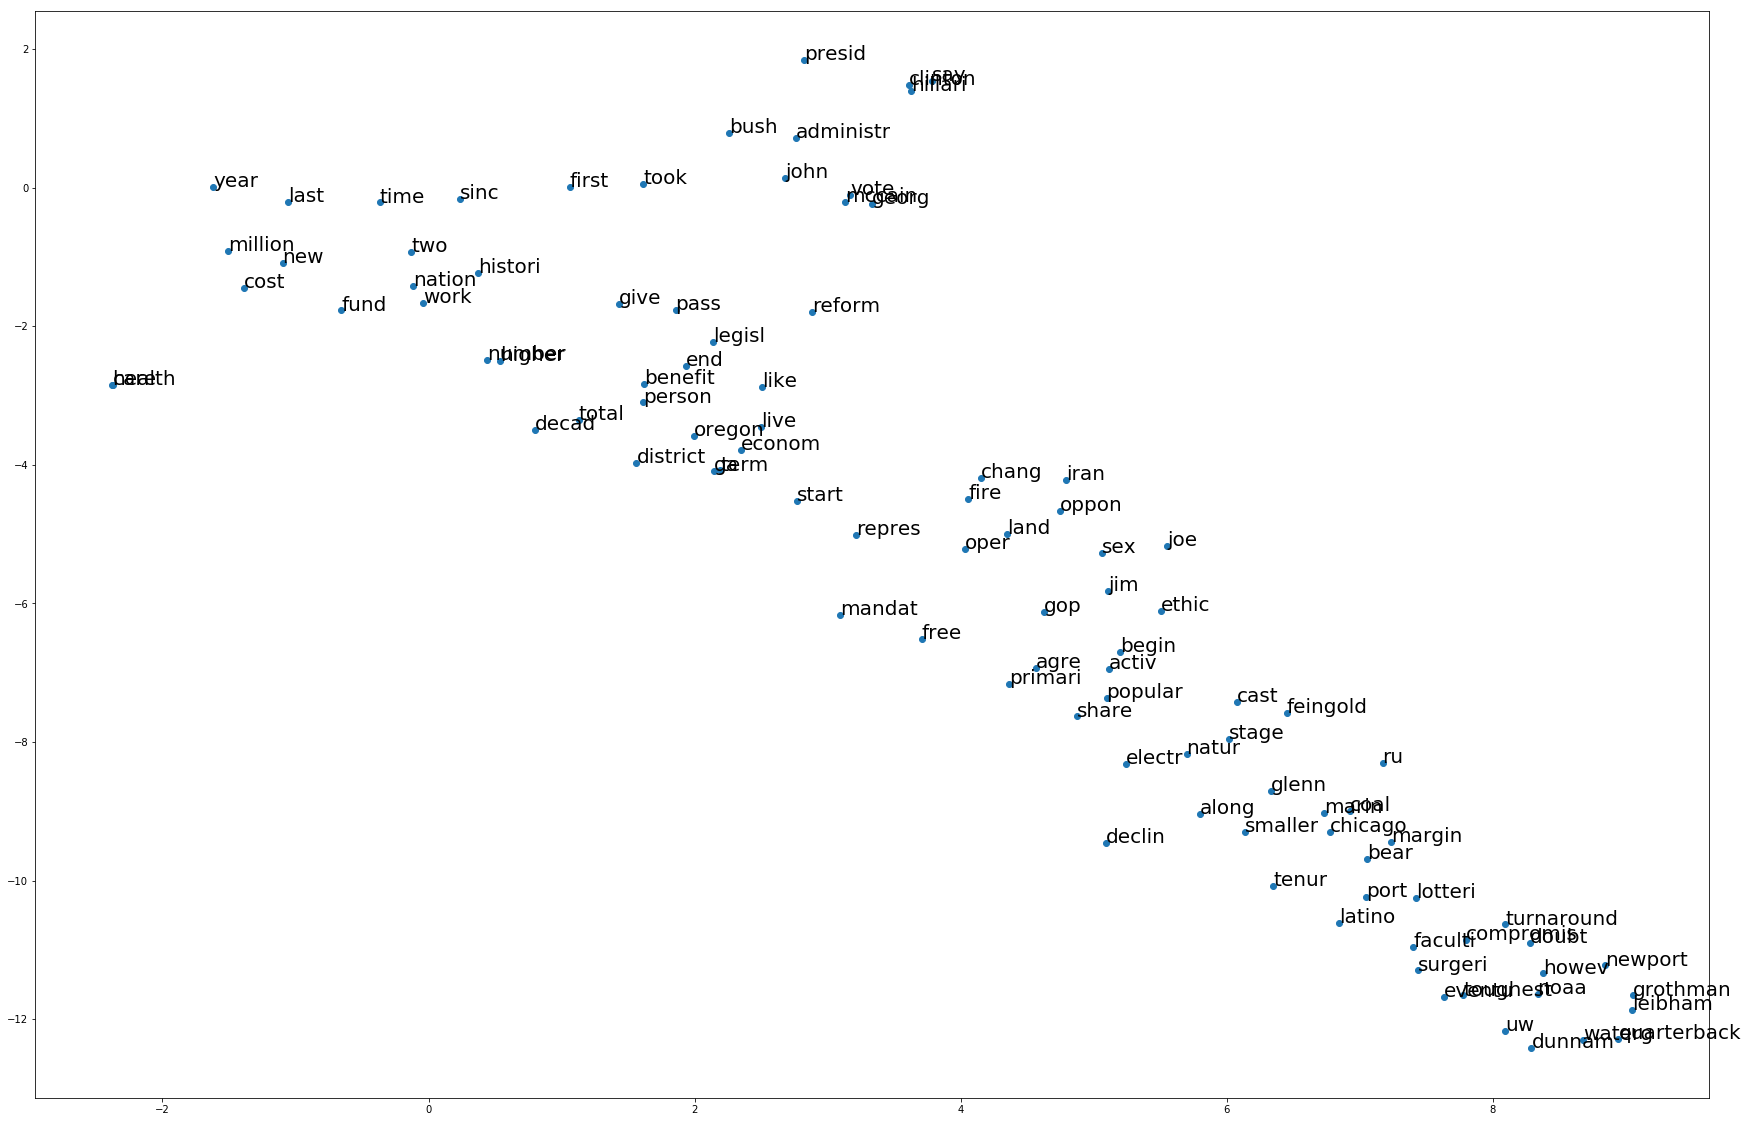

In [38]:
# Import libraries
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore",category=RuntimeWarning)

# List of vocabulary.

vocab = list(w2v.wv.vocab)

# index vector values by corresponding vocab list

X = w2v[vocab]

print("Total Number of Vocab:", len(X))
print()
print(X[0][:10])

# Visualize only 100 words.

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X[:100,:])

df = pd.DataFrame(X_tsne, index = vocab[:100], columns = ['X','Y'])
df.head()

fig = plt.figure()
fig.set_size_inches(30,20)

ax = fig.add_subplot(1,1,1)
ax.scatter(df['X'], df['Y'])

# Put the label on each point.
for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize = 20)
plt.show()

In [44]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

%matplotlib inline

raw_data = training

reindexed_data = raw_data['statement']
reindexed_data.index = raw_data['label']

display(raw_data.head())

,id,label,statement,subjects,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,length
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,141
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,105
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,78
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,54
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,155


Developing list of the top words used in the statements of Liar Liar dataset, . 
Stop words are removed from the dataset to avoid any trivial conjunctions, prepositions, etc.

In [45]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''returns a tuple of the top n words in a sample and their accompanying counts, given a CountVectorizer object and text sample'''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.as_matrix())
    
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

Text(0.5,1,'Top Words')

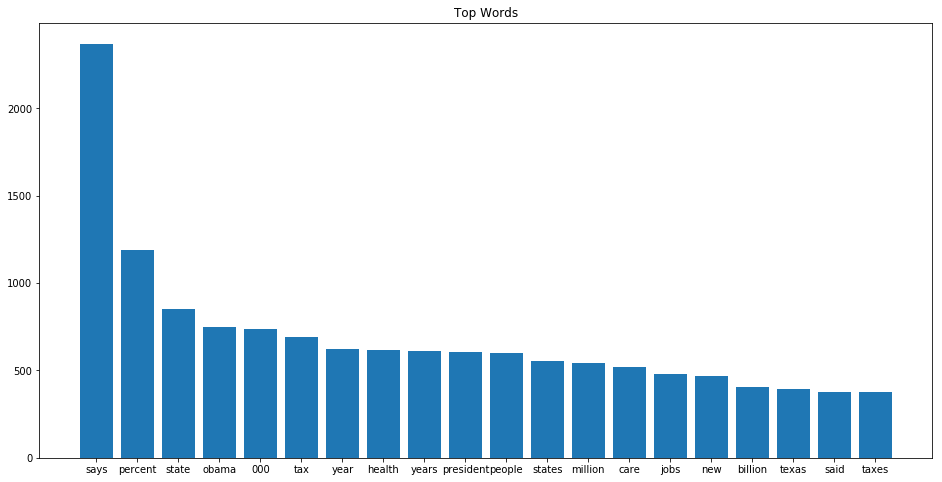

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=20, count_vectorizer=count_vectorizer, text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words)
ax.set_title('Top Words')

## <font color=Orange>Part Of Speech Tagging</font>

Below is the histogram of statement word lengths, and  (POS) part-of-speech tagging to understand the types of words used 
across the corpus. This requires first converting all headline strings to TextBlobs and calling the pos_tags method on each, 
yielding a list of tagged words for each headline. A complete list of such word tags is available here.

In [47]:
from textblob import TextBlob

while True:
    try:
        tagged_headlines = pd.read_csv('abcnews-pos-tagged.csv', index_col=0)
        word_counts = [] 
        pos_counts = {}

        for headline in tagged_headlines[u'tags']:
            headline = ast.literal_eval(headline)
            word_counts.append(len(headline))
            for tag in headline:
                if tag[1] in pos_counts:
                    pos_counts[tag[1]] += 1
                else:
                    pos_counts[tag[1]] = 1

    except IOError:
        tagged_headlines = [TextBlob(reindexed_data[i]).pos_tags for i in range(reindexed_data.shape[0])]

        tagged_headlines = pd.DataFrame({'tags':tagged_headlines})
        tagged_headlines.to_csv('abcnews-pos-tagged.csv')
        continue
    break

print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per headline: ', np.mean(word_counts))


Total number of words:  184817
Mean number of words per headline:  18.05029788065241


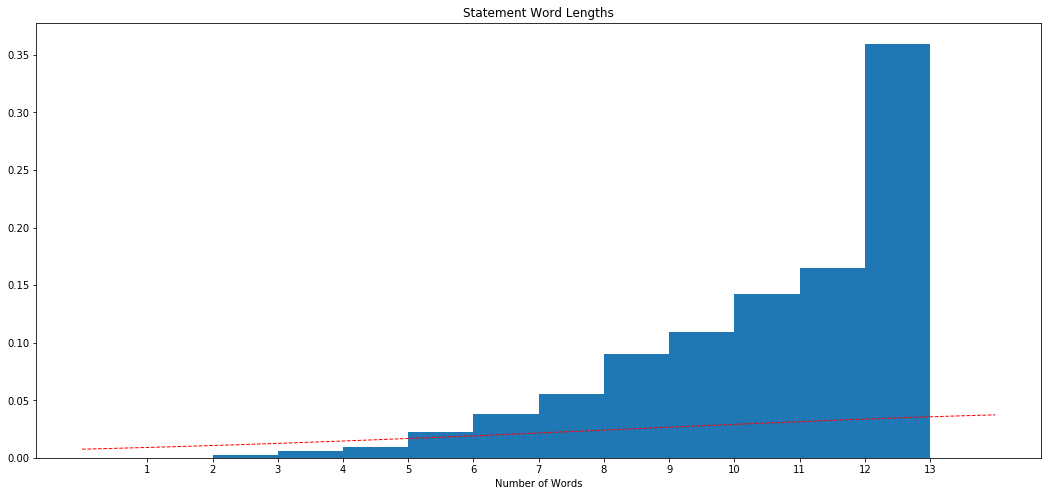

In [48]:
fig, ax = plt.subplots(figsize=(18,8))
ax.hist(word_counts, bins=range(1,14), normed=1)
ax.set_title('Statement Word Lengths')
ax.set_xticks(range(1,14))
ax.set_xlabel('Number of Words')
y = mlab.normpdf( np.linspace(0,14,50), np.mean(word_counts), np.std(word_counts))
l = ax.plot(np.linspace(0,14,50), y, 'r--', linewidth=1)

Text(0.5,0,'Type of Word')

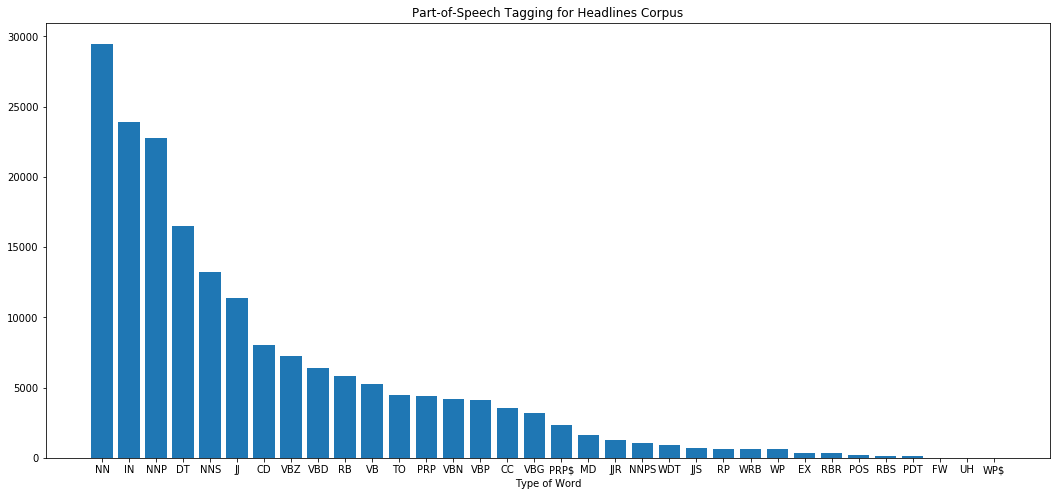

In [49]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(18,8))
ax.bar(range(len(pos_counts)), pos_sorted_counts)
ax.set_xticks(range(len(pos_counts)))
ax.set_xticklabels(pos_sorted_types)
ax.set_title('Part-of-Speech Tagging for Headlines Corpus')
ax.set_xlabel('Type of Word')

## <font color=orange>Topic Modelling</font>

Now, lets apply clustering algorithm to the statements in order to study the focus of topic of all the news contained.  I had experimented this with a small subsample of the dataset in order to determine which of the two potential clustering algorithms is most appropriate.

Preprocessing - Feature Construction; where I would take the sample of text headlines and represent them in feature space. It nothing but, converting each string to a numerical vector. To do this I used,  CountVectorizer from SKLearn, which yields an  n×K  document-term matrix where  K  is the number of distinct words across the  n  headlines in our sample with less stop words and with a limit of max_features.

In [50]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = reindexed_data.sample(n=10000, random_state=0).as_matrix()

print('Headline before vectorization: ', small_text_sample[123])

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Headline after vectorization: \n', small_document_term_matrix[123])

Headline before vectorization:  (U.S. Reps.) Paul Ryan, Sean Duffy and Reid Ribble are shutting down town hall meetings, or making their constituents pay to attend them.
Headline after vectorization: 
   (0, 1232)	1
  (0, 2644)	1
  (0, 6811)	1
  (0, 5028)	1
  (0, 10809)	1
  (0, 9729)	1
  (0, 9117)	1
  (0, 8856)	1
  (0, 3668)	1
  (0, 9488)	1
  (0, 9288)	1
  (0, 8979)	1
  (0, 7812)	1
  (0, 7823)	1
  (0, 6599)	1


Now I would apply the clustering algorithm.<br>
1)Latent Semantic Analysis, 
            OR <br>
2)Latent Dirichilet Allocation. <br>
Both will take document-term matrix as input and yield an  n×N  topic matrix as output, where  N  is the number of topic categories, a parameter we can say. which would be 8 in this case.

In [51]:
n_topics = 8

# Latent Semantic Analysis

LSA is a technique in natural language processing, in particular distributional semantics, of analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms. 
LSA assumes that words that are close in meaning will occur in similar pieces of text

In [52]:
# Taking the  argmax  of each headline in this topic matrix will give the predicted topics of each headline in the sample. 
# We can then sort these into counts of each topic.
# Define helper functions
def get_keys(topic_matrix):
    '''returns an integer list of predicted topic categories for a given topic matrix'''
    keys = []
    for i in range(topic_matrix.shape[0]):
        keys.append(topic_matrix[i].argmax())
    return keys

def keys_to_counts(keys):
    '''returns a tuple of topic categories and their accompanying magnitudes for a given list of keys'''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [53]:
from sklearn.decomposition import TruncatedSVD

lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [54]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''returns a list of n_topic strings, where each string contains the n most common 
        words in a predicted category, in order'''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [55]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i), top_n_words_lsa[i])

Topic 0:  says years people texas voted said new million state obama
Topic 1:  percent rate year people 40 10 years unemployment state income
Topic 2:  health care 000 million insurance law year people plan government
Topic 3:  state 000 year jobs new georgia 10 million billion dollars
Topic 4:  obama president 000 jobs barack year years administration bush created
Topic 5:  state budget wisconsin florida republican years billion rhode texas georgia
Topic 6:  tax taxes plan income cuts billion increase cut middle class
Topic 7:  states united country world republican million people countries half senate


Thus now I converted the small subset of statements into a list of predicted topic categories, where each category is characterised by its most frequent words. 

Text(0.5,1,'LSA Topic Category Counts')

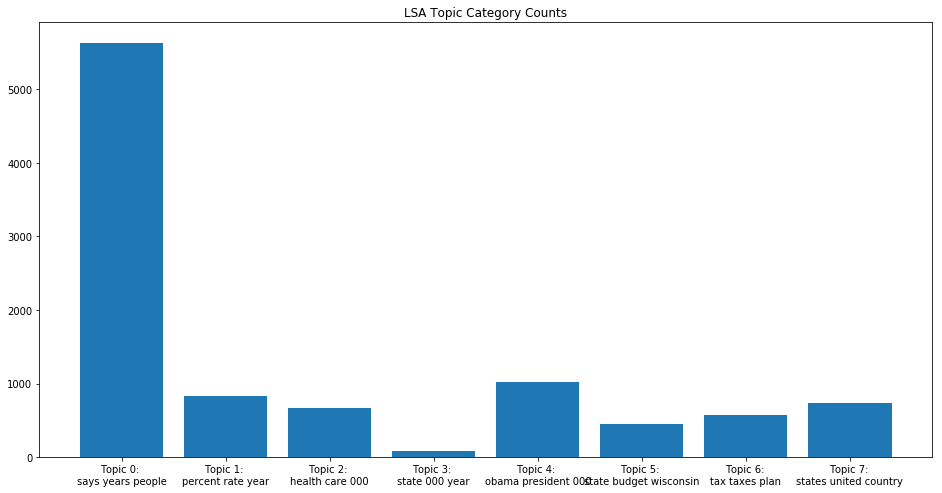

In [56]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts)
ax.set_xticks(lsa_categories)
ax.set_xticklabels(labels)
ax.set_title('LSA Topic Category Counts')

In order to properly differentiate LSA with LDA , lets try using dimensionality-reduction technique called  t -SNE, 
which will also serve to better illuminate the success of the clustering process.

In [57]:
from sklearn.manifold import TSNE

tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.023s...
[t-SNE] Computed neighbors for 10000 samples in 1.360s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.021052
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.492363
[t-SNE] Error after 2000 iterations: 0.961622


Now we have two-dimensional representations ready !! lets plot the clusters using Bokeh. It will be useful to derive the centroid location of each topic before that. This would add context to the visualization.

In [58]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''returns a list of centroid vectors from each predicted topic category'''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [59]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

Loading BokehJS ...

Now lets plot the cluster and see..Also we have included top 3 words in the cluster, that are located on the centriod of that topic.

In [61]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

As we can see above plot is not very convincing.
not much separation of topics is achieved , and it is difficult to tell whether this can be attributed to the LSA decomposition or instead the t -SNE dimensionality reduction process.

# Latent Dirichilet Allocation


Below process is same. Just that, instead of using LSA, I used LDA. LDA is instead a generative probabilistic process, designed with the specific goal of uncovering latent topic structure in text corpora.

In [62]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [63]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [64]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i), top_n_words_lda[i])

Topic 0:  says state scott gov federal rick government court wisconsin walker
Topic 1:  says health care percent tax taxes people voted obama plan
Topic 2:  says obama president barack clinton said hillary trump donald campaign
Topic 3:  says new said obama state administration water make government texas
Topic 4:  jobs 000 million new says job health created insurance sector
Topic 5:  states united says rate percent years year country state people
Topic 6:  says percent federal people year state illegal tax american americans
Topic 7:  says percent state 000 billion tax year years budget texas


Text(0.5,1,'LDA Topic Category Counts')

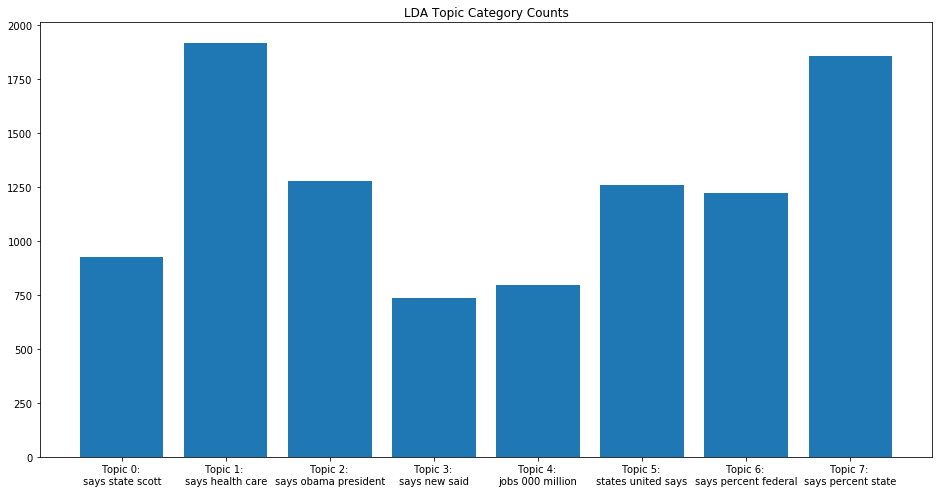

In [65]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts)
ax.set_xticks(lda_categories)
ax.set_xticklabels(labels)
ax.set_title('LDA Topic Category Counts')

To achieve better comparison, we again take this topic matrix and project it into two dimensions with  t -SNE.

In [66]:
from sklearn.manifold import TSNE

tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.016s...
[t-SNE] Computed neighbors for 10000 samples in 1.522s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.090871
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.454643
[t-SNE] Error after 2000 iterations: 1.739634


In [67]:
top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

Now that impressive! Its evident that LDA has had much more succcess than LSA in distinguishing the topic categories. Therefore, LDA is an appropriate algorithm for our case.